# plot $M_*-z$ relationship for BGS

In [1]:
import os
import h5py 
import numpy as np

In [2]:
from astropy import table as aTable

In [3]:
# -- plotting -- 
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False

In [4]:
fvagc = '/tigress/chhahn/provabgs/svda/BGS_ANY_full.provabgs.hdf5'
vagc = aTable.Table.read(fvagc)
has_va = (vagc['provabgs_z_max'] != -999.)

In [27]:
print(len(vagc), np.sum(has_va))

264973 241005


In [28]:
bgs_bright = vagc[vagc['is_bgs_bright'] & has_va]

(0.0, 1.0)

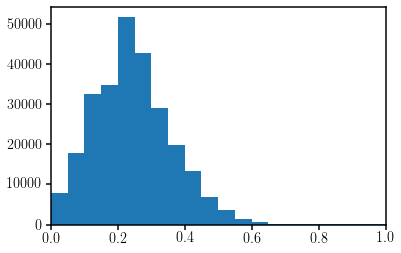

In [33]:
plt.hist(vagc['Z_HP'], range=(0., 1.), bins=20)
plt.xlim(0., 1.)

In [25]:
print('%i BGS Bright galaxies' % len(bgs_bright))

143017 BGS Bright galaxies


In [6]:
bgs_faint = vagc[vagc['is_bgs_faint'] & has_va]

In [26]:
print('%i BGS FAINT galaxies' % len(bgs_faint))

95499 BGS FAINT galaxies


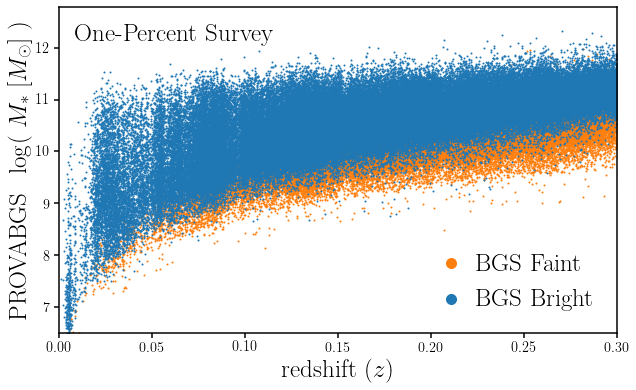

In [32]:
fig = plt.figure(figsize=(10,6))
sub = fig.add_subplot(111)

sub.scatter(bgs_faint['Z_HP'].data, bgs_faint['provabgs_logMstar_bf'].data, 
            c='C1', s=1, rasterized=True, label='BGS Faint')
sub.scatter(bgs_bright['Z_HP'].data, bgs_bright['provabgs_logMstar_bf'].data, 
            c='C0', s=1, rasterized=True, label='BGS Bright') 

sub.legend(loc='lower right', markerscale=10, handletextpad=0., fontsize=25)
sub.set_xlabel(r"redshift ($z$)", fontsize=25)
sub.set_xlim(0., 0.3)
sub.set_xticks([0., 0.05, 0.1, 0.15, 0.2, 0.25, 0.3])
sub.set_ylabel(r"PROVABGS $~\log($ $M_*$ [$M_\odot$] )", fontsize=25)
sub.set_ylim(6.5, 12.8)
sub.text(0.03, 0.95, r'One-Percent Survey', ha='left', va='top', fontsize=25, transform=sub.transAxes)
fig.savefig('../figs/mstar_z.pdf', bbox_inches='tight')